# 1.4.2 Image Thresholding

## Simple Thresholding

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def showImage(img):
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread('mountain-03-1024x768.jpg')
showImage(img)  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
h,w=256,512
gray = np.zeros((h,w), np.uint8)
for i in range(h):
    for j in range(w):
#        gray[i,j]=i%256
#        gray[i,j]=(i+j)%256
        gray[i,j]=j%256

In [6]:
showImage(gray)  

In [7]:
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]

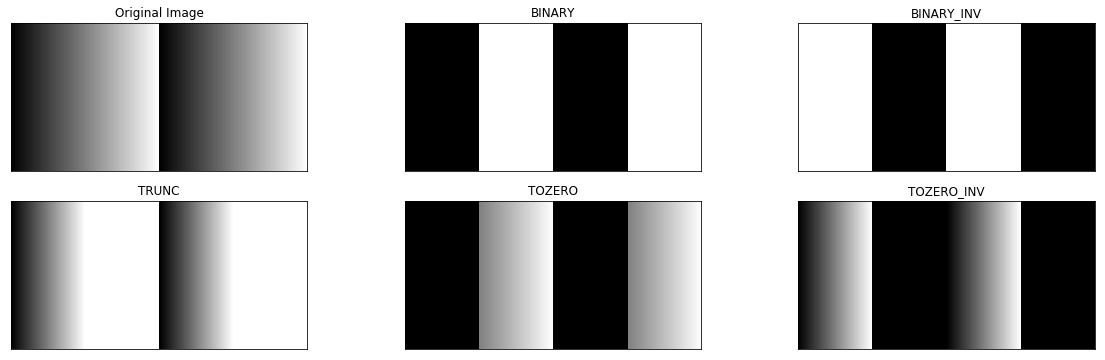

In [8]:
plt.figure(figsize=(20,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [50]:
def nothing(x):
    pass

In [51]:
cv2.namedWindow('threshold')
cv2.createTrackbar('threshold','threshold',0,255,nothing)
img = cv2.imread('./Sudoku/sIMG_2168.jpg',0)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
cv2.imshow('image',img)
while(1):
    threshold = cv2.getTrackbarPos('threshold','threshold')    
    ret,th1 = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
    if threshold == 0:
        th1=img
    cv2.imshow('threshold',th1)
    k = cv2.waitKey(40) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

## Adaptive Thresholding

In [17]:
img = cv2.imread('./Sudoku/sIMG_2168.jpg',0) #2180
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
    'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

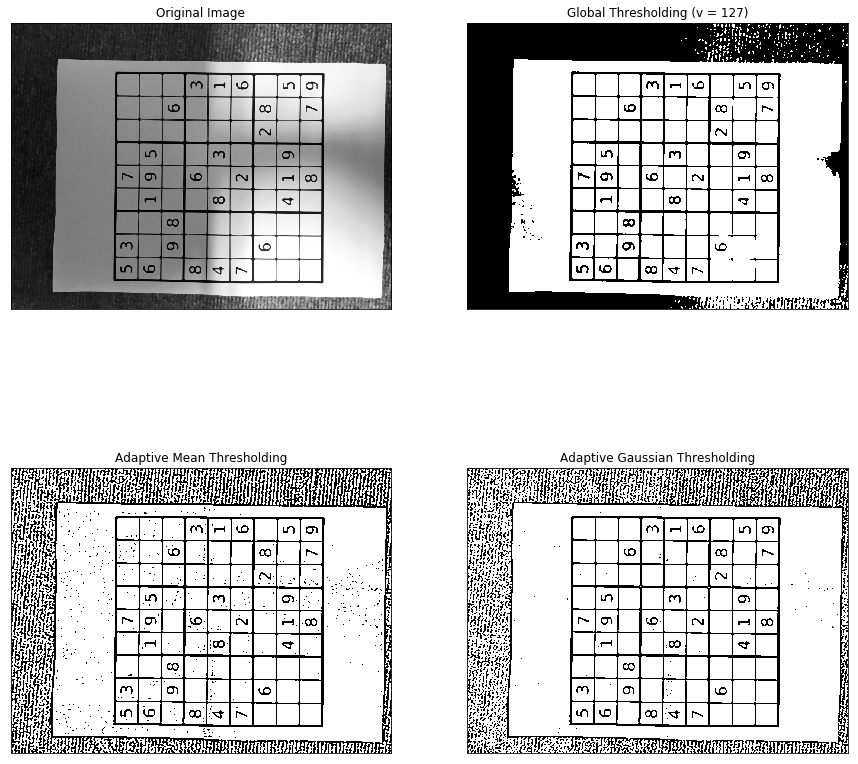

In [18]:
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu's Binarization

In [19]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [20]:
def showImage(img):
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [21]:
img = cv2.imread('./Sudoku/IMG_2169.jpg',0)
# height,width=img.shape
# for i in range(height):
#    for j in range(width):
#        img[i,j]+=random.randint(-5,5)

In [26]:
h,w,m=256,512,32
gray = np.zeros((h,w), np.uint8)
for i in range(h):
    for j in range(w):
        gray[i,j]=j%256        

In [27]:
for i in range(int(h/2)):
    for j in range(int(w/2)):
        gray[i+int(h/4),j+int(w/4)]=64                

In [28]:
img = np.copy(gray)
for i in range(h):
    for j in range(w):
        value=(gray[i,j]+random.randint(-m,m))
        if value < 0:
            img[i,j] = 0
        elif value > 255:
            img[i,j] = 255
        else :
            img[i,j] = value

In [29]:
cv2.imshow('gray',gray)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()        

In [31]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [32]:
# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
    'Original Noisy Image','Histogram',"Otsu's Thresholding",
    'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

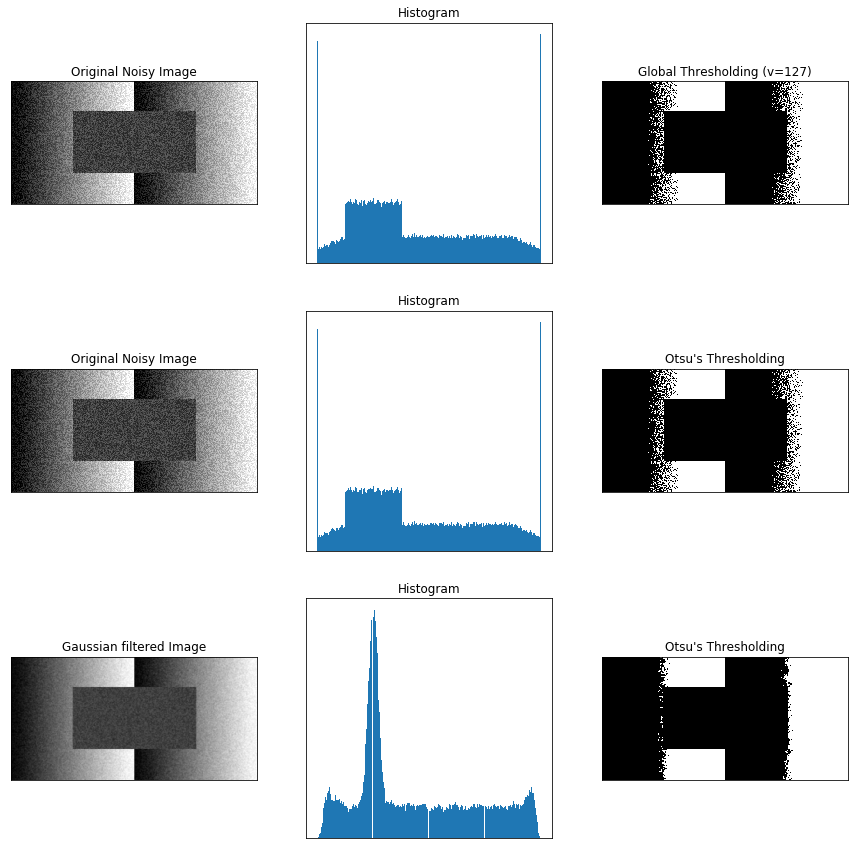

In [33]:
plt.figure(figsize=(15,15))
for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3), plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

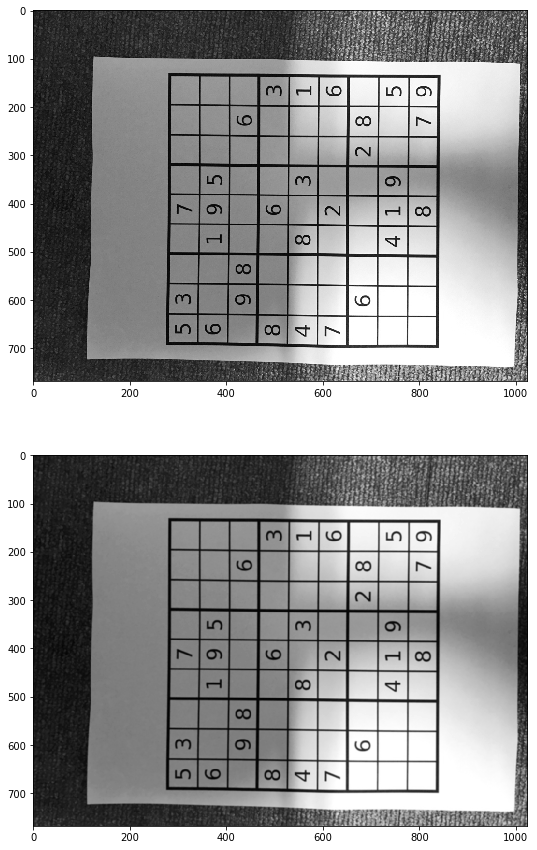

In [34]:
img = cv2.imread('./Sudoku/sIMG_2168.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)
plt.figure(figsize=(30,15))
plt.subplot(2,1,1), plt.imshow(img,'gray')
plt.subplot(2,1,2), plt.imshow(blur,'gray')
plt.show()
# find normalized_histogram, and its cumulative distribution function

In [35]:
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
# hist

In [36]:
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

In [37]:
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights    
#    print(i, q1, q2)

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh,ret)

116 115.0


C:\Users\user\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\user\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\user\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


## Histogram Plot

In [52]:
h,w,m=256,512,50
gray = np.zeros((h,w), np.uint8)
for i in range(h):
    for j in range(w):
        gray[i,j]=j%256  

In [53]:
hist = np.zeros(256, np.uint32)

In [55]:
hist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [56]:
for i in range(h):
    for j in range(w):
        hist[gray[i,j]]+=1  

In [57]:
hist

array([512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 51

In [58]:
img = np.copy(gray)
for i in range(h):
    for j in range(w):
        value=(gray[i,j]+random.randint(-m,m))
        if value < 0:
            img[i,j] = 0
        elif value > 255:
            img[i,j] = 255
        else :
            img[i,j] = value

In [59]:
for i in range(h):
    for j in range(w):
        hist[img[i,j]]+=1  

In [60]:
hist

array([7142,  771,  771,  783,  776,  798,  836,  806,  801,  790,  793,
        844,  839,  865,  834,  853,  876,  840,  855,  909,  865,  865,
        897,  888,  879,  931,  926,  916,  887,  920,  926,  983,  937,
        916,  971,  917,  965,  952,  991,  980, 1021, 1000, 1002,  994,
       1001, 1001,  974,  990, 1008,  991, 1035, 1027, 1030, 1063, 1011,
       1023, 1023, 1048,  965,  992, 1047, 1007,  989, 1048, 1030, 1018,
       1002, 1051, 1031, 1033, 1031, 1062,  999, 1044, 1029, 1016, 1024,
        998,  976, 1067, 1049, 1028, 1009, 1024, 1015, 1014, 1011, 1019,
        992, 1055, 1045, 1012, 1028, 1006, 1019, 1035, 1005, 1013, 1015,
       1044, 1026, 1030, 1065, 1036, 1051,  975, 1015, 1024, 1079,  985,
       1024,  984,  986,  991, 1040, 1063, 1024, 1015, 1002,  990,  981,
       1046,  993, 1004, 1043, 1023, 1022, 1041, 1043, 1078, 1027, 1014,
       1021, 1070, 1034,  995, 1035, 1018, 1018,  952, 1029, 1022,  976,
       1018, 1011,  986, 1091, 1051, 1058, 1016, 10

In [46]:
sum(hist)

262144

In [47]:
w*h

131072

In [48]:
h,w,ch=256,512,3
img = np.zeros((h,w,3), np.uint8)
cv2.rectangle(img,(0,h-0),(10,h-50),(0,255,0),0) 
cv2.rectangle(img,(10,h-0),(20,h-150),(0,255,0),0) 
cv2.rectangle(img,(20,h-0),(30,h-32),(0,255,0),0) 
showImage(img)